In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward
import seaborn as sns
from sklearn.metrics import silhouette_score
import subprocess
import sys

In [2]:
# Function to auto-install and load packages
def install_and_load(packages):
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            import subprocess
            subprocess.call(['pip', 'install', package])
            importlib.import_module(package)  # Reload the module after installation

In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import sklearn
print(sklearn.__version__)

1.2.2


In [5]:
# Read the data
survey_df = pd.read_csv('/Users/shreyamishra/Desktop/Survey.csv')

In [6]:
# Adjust the column range accordingly
sur_int = survey_df.iloc[:, 19:45] 

In [7]:
# Scale the data
sur_int_scaled = scale(sur_int)

In [8]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(sur_int_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=123)

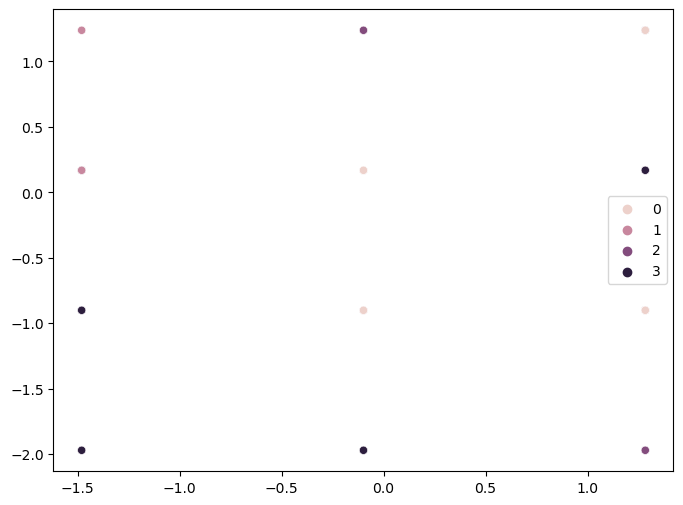

In [9]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sur_int_scaled[:, 0], y=sur_int_scaled[:, 1], hue=kmeans.labels_)
plt.show()

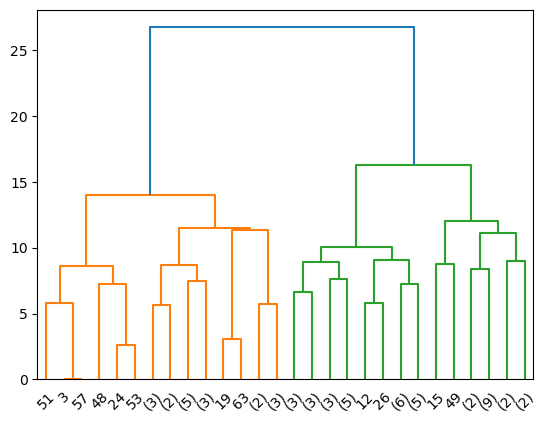

In [10]:
# Perform hierarchical clustering
linkage_matrix = ward(sur_int_scaled)
dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.show()

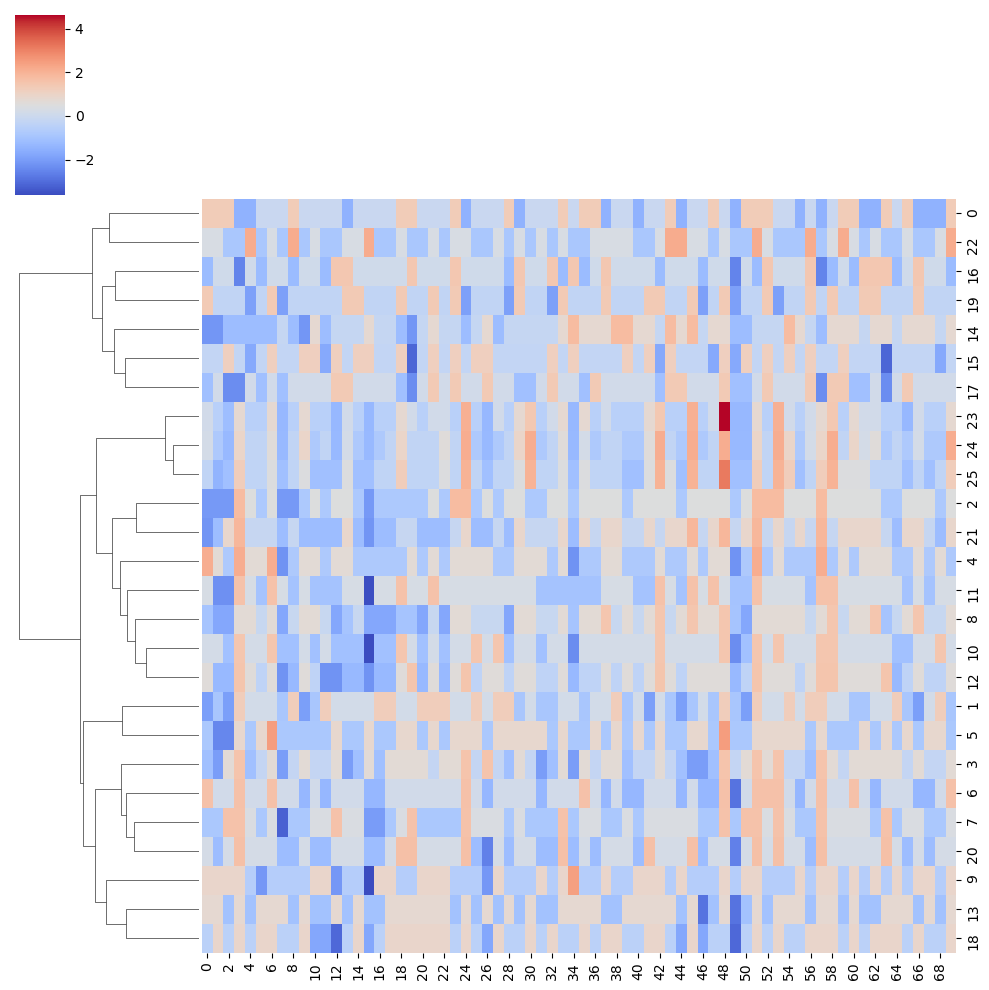

In [11]:
# Plot the heatmap with clusters
sns.clustermap(sur_int_scaled.T, method='ward', cmap='coolwarm', figsize=(10, 10), col_cluster=False)
plt.show()